In [6]:
import networkx as nx
import random
import math
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Read from CSV
file=[]
with open(r'C:\Users\HARIHARAN SUBRAMANIA\Desktop\Delhi\Delhi_EdgeList.csv') as f:
    reader=csv.reader(f)
    for row in reader:
        file.append(row)
road_network_list=[]
for row in file:
    try:
        road_network_list.append([int(row[2]),int(row[3]),float(row[5])])
    except:
        pass

intersections=[]
for item in road_network_list:
    if item[0] not in intersections:
        intersections.append(item[0])
    if item[1] not in intersections:
        intersections.append(item[1])
len(intersections)

KeyboardInterrupt: 

In [ ]:
original_road_network=nx.Graph()
for node in intersections:
    original_road_network.add_node(node)
for item in road_network_list:
    original_road_network.add_edge(item[0],item[1])
    original_road_network[item[0]][item[1]]['w']=item[2]    

In [ ]:
#original_road_network=nx.erdos_renyi_graph(100,0.2)

In [139]:
#Confirming if all vertices and edges are in the same component
nx.number_connected_components(original_road_network)
ORN=original_road_network.copy()

In [142]:
#Average distance calc for getting idea of t
avg=0
for edge in ORN.edges():
    avg+=ORN[edge[0]][edge[1]]['w']
avg/=len(ORN.edges())
print(avg)

109.53071590698664


In [140]:
#assigning random weights
# for edge in ORN.edges():
#     ORN[edge[0]][edge[1]]['w']=random.randint(1,7)

In [ ]:
#threshold
t=35
RN=nx.Graph()
for node in ORN.nodes():
    RN.add_node(node)

for u in ORN.nodes():
    for v in ORN.nodes():
        try:
            if u!=v and nx.shortest_path_length(ORN,u,v,weight='w')<=t:
                RN.add_edge(u,v)
        except:
            pass

In [ ]:
delta=1000000
for node in RN.nodes():
    delta=min(delta,RN.degree(node))

In [123]:
#define k(always <= delta it needs to be defined)
k=3
bkminus1=math.factorial(delta)/(math.factorial(k-1)*math.factorial(delta-k+1))
deltaprime=delta-k+1

In [124]:
p=1-(1/(bkminus1*(1+deltaprime))**(1/deltaprime))

In [125]:
A=[]
for v in RN.nodes():
    if random.random()<p: #littel confused about "picking with probability p"
        A.append(v)
B=[]
neg=[] # Vr-A
for v in RN.nodes():
    if v not in A:
        neg.append(v)
for v in neg:
    neighbor_list=list(RN.neighbors(v))
    counter=0
    for common in neighbor_list:
        if common in A:
            counter+=1
    if counter<k:
        B.append(v)

D=[]
for common in B:
    if common not in D:
        D.append(common)
for common in A:
    if common not in D:
        D.append(common)
    



In [126]:
D

[1,
 2,
 3,
 5,
 6,
 7,
 20,
 25,
 26,
 27,
 29,
 32,
 35,
 36,
 39,
 42,
 44,
 48,
 49,
 50,
 51,
 54,
 58,
 59,
 61,
 63,
 64,
 68,
 71,
 72,
 73,
 74,
 76,
 81,
 83,
 87,
 88,
 89,
 90,
 92,
 96,
 97,
 98,
 99]

In [ ]:
nx.draw(original_road_network)

In [3]:
len(original_road_network.nodes())

NameError: name 'original_road_network' is not defined

In [8]:
G=nx.complete_graph(10)

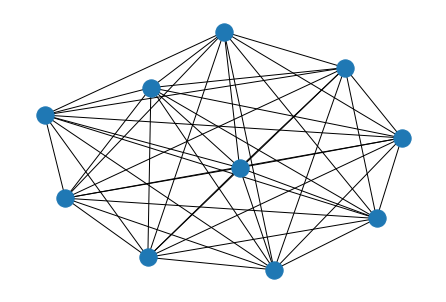

In [9]:
nx.draw(G)